# Fission Sources, Particle Tracks, and Fixed Source Problems

In [1]:
import openmc
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

## Fission Sources

Here we'll discuss visualization of OpenMC's fission sources and defining source distributions for fixed source problems.

Fission sources iterated during the inactive cycles of an eigenvalue solution. They are written as part of OpenMC statepoint files. Here, we'll look at how to examine and vizualize the fission source.

First, we'll need a model to work with.

In [2]:
model = openmc.examples.pwr_pin_cell()
# extend model to 3D
z_min = openmc.ZPlane(-50.0, boundary_type='vacuum')
z_max = openmc.ZPlane(50.0, boundary_type='vacuum')

model_cells = model.geometry.get_all_cells()
for cell in model_cells.values():
    cell.region &= +z_min & -z_max

In [3]:
model.settings.batches = 20
model.settings.inactive = 10
model.settings.particles = 5000
sp_filename = model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

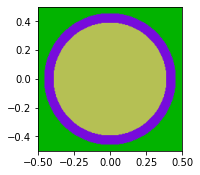

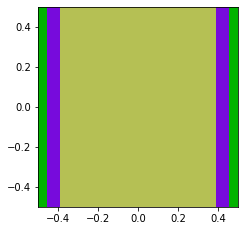

In [4]:
model.geometry.root_universe.plot()
model.geometry.root_universe.plot(basis='xz')

In [5]:
with openmc.StatePoint(sp_filename) as sp:
    fission_source = sp.source
    for entry, time in sp.runtime.items():
        print("{}: {:.4f} seconds".format(entry, time))

SEND-RECV source sites: 0.0006 seconds
accumulating tallies: 0.0044 seconds
active batches: 12.7745 seconds
inactive batches: 9.0147 seconds
reading cross sections: 1.2056 seconds
sampling source sites: 0.0094 seconds
simulation: 21.7891 seconds
synchronizing fission bank: 0.0100 seconds
total: 23.0350 seconds
total initialization: 1.2141 seconds
transport: 21.7686 seconds
writing statepoints: 0.0019 seconds


In [6]:
fission_source[0]

((-0.06921759, 0.06257126, -1.23817249), (-0.94150359, -0.2182108, -0.25681711), 1755745.22323992, 0.0005837, 1., 0, 0, 0)

In [7]:
fission_source.dtype

dtype({'names': ['r', 'u', 'E', 'time', 'wgt', 'delayed_group', 'surf_id', 'particle'], 'formats': [[('x', '<f8'), ('y', '<f8'), ('z', '<f8')], [('x', '<f8'), ('y', '<f8'), ('z', '<f8')], '<f8', '<f8', '<f8', '<i4', '<i4', '<i4'], 'offsets': [0, 24, 48, 56, 64, 72, 76, 80], 'itemsize': 104})

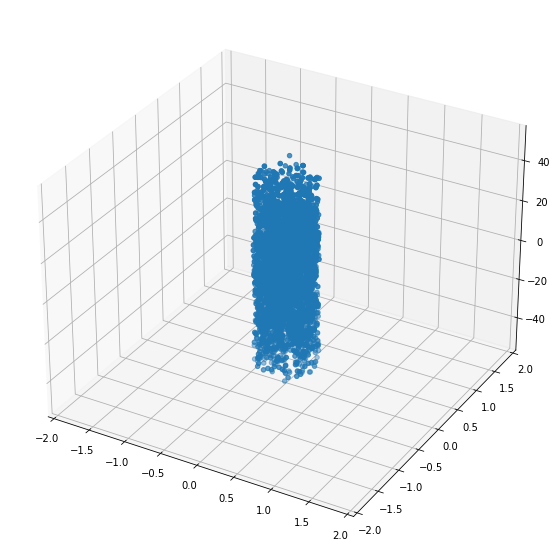

In [8]:
xs = [site['r'][0] for site in fission_source]
ys = [site['r'][1] for site in fission_source]
zs = [site['r'][2] for site in fission_source]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(xs, ys, zs)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

# Working with track files

OpenMC can generate track files for particles, including secondary particles. A track "state" is stored at each collision and includes the following information:

r, u, E, time, wgt, cell_id, cell_instance, and material_id

  - Position in Cartesian coordinates, `r`
  - Unit vector for the particle's direction, `u`
  - Energy, `E`
  - Time, `t`
  - Cell ID, `cell_id`
  - Cell Instance, `cell_instance`
  - Material ID, `material_id`
  
We're going to tell the next OpenMC run to write out the first 100 particles by applying the following settings:

In [9]:
model.settings.max_tracks = 5000
model.run(tracks=True)

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

PosixPath('/home/pshriwise/repos/openmc-nea-course/notebooks/10-fixed-source/Solution/statepoint.20.h5')

In [10]:
!ls

geometry.xml		 settings.xml	   summary.h5	 tracks.h5
materials.xml		 Sources.ipynb	   tallies.out	 tracks.vtp
partial_ring_source.png  statepoint.10.h5  tallies.xml
plots.xml		 statepoint.20.h5  tracks_0.vtp


In [11]:
tracks = openmc.Tracks('tracks.h5') 
track = tracks[0]

In [12]:
len(tracks)

5000

In [13]:
print(track)

<Track (1, 1, 1): 1 particles>


In [14]:
n = track.particle_tracks[0]

In [15]:
n.states[0:10]

array([(( 0.29478527, 0.0207911 ,  0.70780576), (-0.53273507,  0.63180335, -0.5630434 ), 625466.92271294, 0.00000000e+00, 1., 1, 0, 1),
       (( 0.11125939, 0.23844575,  0.51383874), (-0.42829462,  0.50987388, -0.74605117), 580412.05404301, 3.15085500e-10, 1., 1, 0, 1),
       ((-0.01754762, 0.39178723,  0.28946837), (-0.42829462,  0.50987388, -0.74605117), 580412.05404301, 6.00619367e-10, 1., 2, 0, 2),
       ((-0.06819786, 0.45208505,  0.20124016), (-0.42829462,  0.50987388, -0.74605117), 580412.05404301, 7.12898639e-10, 1., 3, 0, 3),
       ((-0.21764661, 0.63      , -0.05908629), (-0.42829462, -0.50987388, -0.74605117), 580412.05404301, 1.04419024e-09, 1., 3, 0, 3),
       ((-0.33095903, 0.49510444, -0.25646646), (-0.71520097,  0.13342277, -0.68606555), 326477.58286475, 1.29537635e-09, 1., 3, 0, 3),
       ((-0.63      , 0.55089138, -0.54332528), ( 0.71520097,  0.13342277, -0.68606555), 326477.58286475, 1.82457275e-09, 1., 3, 0, 3),
       ((-0.20594526, 0.63      , -0.95010514), 

In [16]:
n.states.dtype

dtype({'names': ['r', 'u', 'E', 'time', 'wgt', 'cell_id', 'cell_instance', 'material_id'], 'formats': [[('x', '<f8'), ('y', '<f8'), ('z', '<f8')], [('x', '<f8'), ('y', '<f8'), ('z', '<f8')], '<f8', '<f8', '<f8', '<i4', '<i4', '<i4'], 'offsets': [0, 24, 48, 56, 64, 72, 76, 80], 'itemsize': 88})

In [17]:
for state in n.states[0:10]:
    for name, val in zip(n.states.dtype.names, state):
        print(f"{name}: {val}")
    print()
        

r: (0.29478527, 0.0207911, 0.70780576)
u: (-0.53273507, 0.63180335, -0.5630434)
E: 625466.9227129361
time: 0.0
wgt: 1.0
cell_id: 1
cell_instance: 0
material_id: 1

r: (0.11125939, 0.23844575, 0.51383874)
u: (-0.42829462, 0.50987388, -0.74605117)
E: 580412.0540430082
time: 3.1508550018284523e-10
wgt: 1.0
cell_id: 1
cell_instance: 0
material_id: 1

r: (-0.01754762, 0.39178723, 0.28946837)
u: (-0.42829462, 0.50987388, -0.74605117)
E: 580412.0540430082
time: 6.006193667938575e-10
wgt: 1.0
cell_id: 2
cell_instance: 0
material_id: 2

r: (-0.06819786, 0.45208505, 0.20124016)
u: (-0.42829462, 0.50987388, -0.74605117)
E: 580412.0540430082
time: 7.128986385329803e-10
wgt: 1.0
cell_id: 3
cell_instance: 0
material_id: 3

r: (-0.21764661, 0.63, -0.05908629)
u: (-0.42829462, -0.50987388, -0.74605117)
E: 580412.0540430082
time: 1.0441902360731279e-09
wgt: 1.0
cell_id: 3
cell_instance: 0
material_id: 3

r: (-0.33095903, 0.49510444, -0.25646646)
u: (-0.71520097, 0.13342277, -0.68606555)
E: 326477.58286

These files can also be visualized easily by using the `openmc.Tracks.plot` method or by writing them to VTK.

<Axes3DSubplot:xlabel='x [cm]', ylabel='y [cm]'>

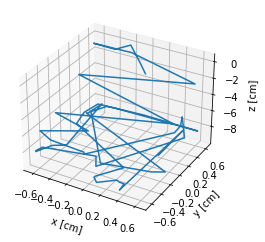

In [18]:
track.plot()

<Axes3DSubplot:xlabel='x [cm]', ylabel='y [cm]'>

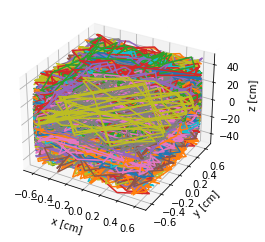

In [19]:
tracks.plot()

## Fixed Source Problems

Unlike eigenvalue problems in which inactive batches are necessary for the source to converge, fixed source problems denote a class of problems in which the exact source is specified as part of the problem setup.

First we'll create a problem to work with. We'll start by looking at a simple planar shield with a point source on one side.

In [20]:
# define some shielding materials
water = openmc.Material(name='Water')
water.set_density('g/cc', 1.0)
water.add_element('H', 2.0)
water.add_element('O', 1.0)

steel = openmc.Material(name='Steel')
steel.set_density('g/cc', 8.0)
steel.add_element('Si', 0.010048)
steel.add_element('S', 0.00023)
steel.add_element('Fe', 0.669)
steel.add_element('Ni', 0.12)
steel.add_element('Mo', 0.025)
steel.add_nuclide('P31',0.00023)
steel.add_nuclide('Mn55',0.011014)

air = openmc.Material(name='Air')
air.set_density('g/cc', 0.001205)
air.add_element('N', 0.784431)
air.add_element('O', 0.210748)
air.add_element('Ar',0.0046)

iron = openmc.Material(name="Iron")
iron.set_density("g/cm3", 7.874)
iron.add_nuclide("Fe54", 0.0564555822608)
iron.add_nuclide("Fe56", 0.919015287728)
iron.add_nuclide("Fe57", 0.0216036861685)
iron.add_nuclide("Fe58", 0.00292544384231)

material_colors = {air: 'white',
                   steel: 'gray',
                   water: 'blue',
                   iron: 'brown'}

In [21]:
# create a geometry
x0 = openmc.XPlane(0.0, boundary_type='vacuum')
x1 = openmc.XPlane(5.0)
x2 = openmc.XPlane(8.0)
x3 = openmc.XPlane(10.0)
x4 = openmc.XPlane(12.0)
x5 = openmc.XPlane(15.0, boundary_type='vacuum')

# can also use this convenience function
# regions = openmc.model.subdivide([x0, x1, x2, x3, x4])

y_min = openmc.YPlane(-5.0, boundary_type='vacuum')
y_max = openmc.YPlane(5.0, boundary_type='vacuum')
z_min = openmc.ZPlane(-5.0, boundary_type='vacuum')
z_max = openmc.ZPlane(5.0, boundary_type='vacuum')

In [22]:
cell0 = openmc.Cell(fill=air, region=+x0 & -x1)
cell1 = openmc.Cell(fill=steel, region=+x1 & -x2)
cell2 = openmc.Cell(fill=water, region=+x2 & -x3)
cell3 = openmc.Cell(fill=iron, region=+x3 & -x4)
cell4 = openmc.Cell(fill=air, region=+x4 & -x5)

cells = [cell0, cell1, cell2, cell3, cell4]

In [23]:
for cell in cells:
    cell.region &= +y_min & -y_max & +z_min & -z_max

In [24]:
geometry = openmc.Geometry(cells)
model = openmc.Model(geometry=geometry)

In [25]:
cell3

Cell
	ID             =	7
	Name           =	
	Fill           =	Material 7
	Region         =	(12 -13 15 -16 17 -18)
	Rotation       =	None
	Temperature    =	None
	Translation    =	None
	Volume         =	None

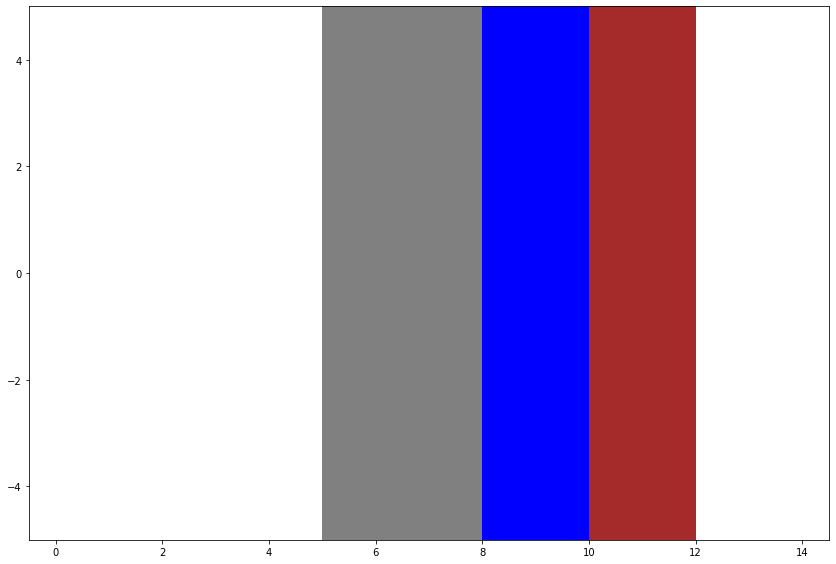

In [26]:
model.geometry.root_universe.plot(origin=(7.0, 0.0, 0.0), width=(15.0, 10.0), pixels=(800, 800), color_by='material', colors=material_colors)

## Defining a source term

Now we'll define a source. To start, we'll define a simple point source.

Sources in OpenMC are composed of space, angle, and energy distributions. There are a number of distributions available in the `openmc.stats` module to helps us define these sources.

In [27]:
# bump x location slightly to avoid lost particles
point = openmc.stats.Point((0.1, 0.0, 0.0))
energy = openmc.stats.Discrete([1e6], [1.0])
source = openmc.Source(space=point, energy=energy)

In [28]:
source.particle = 'photon'

In [29]:
model.settings.source = source
model.settings.run_mode = 'fixed source'
model.settings.particles = 10000
model.settings.batches = 10

In [30]:
mesh = openmc.RegularMesh.from_domain(model.geometry)
mesh.dimension = (80, 80, 1)

mesh_filter = openmc.MeshFilter(mesh)

particle_filter = openmc.ParticleFilter(['neutron', 'photon'])

flux_mesh_tally = openmc.Tally(name='mesh flux')
flux_mesh_tally.filters = [mesh_filter, particle_filter]
flux_mesh_tally.scores = ['flux']

model.tallies = [flux_mesh_tally]

In [31]:
sp_filename = model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [32]:
sp = openmc.StatePoint(sp_filename)
print(sp.source)
sp.close()

None


In [33]:
!ls

geometry.xml		 settings.xml	   summary.h5	 tracks.h5
materials.xml		 Sources.ipynb	   tallies.out	 tracks.vtp
partial_ring_source.png  statepoint.10.h5  tallies.xml
plots.xml		 statepoint.20.h5  tracks_0.vtp


In [34]:
with openmc.StatePoint(sp_filename) as sp:
    flux_mesh_tally = sp.get_tally(name='mesh flux')

In [35]:
neutron_mean = flux_mesh_tally.get_values(filters=[openmc.ParticleFilter], filter_bins=[('neutron',)])
photon_mean =  flux_mesh_tally.get_values(filters=[openmc.ParticleFilter], filter_bins=[('photon',)])
print(np.max(neutron_mean))
print(np.max(photon_mean))

0.0
0.09377433091581694


In [36]:
model.tallies = [flux_mesh_tally]
flux_mesh_tally.remove_filter(particle_filter)


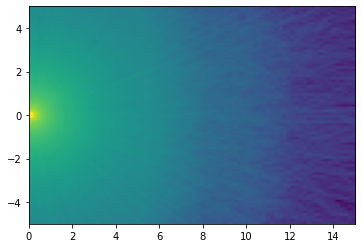

In [37]:
llc, urc = model.geometry.bounding_box
# use log norm
plt.imshow(photon_mean.reshape(*mesh.dimension[:2][::-1]), origin='lower', extent=(llc[0], urc[0], llc[1], urc[1]), norm=LogNorm())

Now we'll look at another way to visualize the source using what we've learned about track files. First, we'll re-run our model with tracks enabled

In [38]:
model.settings.max_tracks = 1000
model.run(tracks=True, output=False)

PosixPath('/home/pshriwise/repos/openmc-nea-course/notebooks/10-fixed-source/Solution/statepoint.10.h5')

In [39]:
!cat tallies.xml

<?xml version='1.0' encoding='utf-8'?>
<tallies>
  <mesh id="2">
    <dimension>80 80 1</dimension>
    <lower_left>0.0 -5.0 -5.0</lower_left>
    <width>0.1875 0.125 10.0</width>
  </mesh>
  <filter id="2" type="mesh">
    <bins>2</bins>
  </filter>
  <tally id="2" name="mesh flux">
    <filters>2</filters>
    <nuclides>total</nuclides>
    <scores>flux</scores>
    <estimator>tracklength</estimator>
  </tally>
</tallies>


In [40]:
tracks = openmc.Tracks()

By looking at the first state of the first particle in each track. We can extract the explicit source sites of the fixed source.

In [41]:
xs = []
ys = []
zs = []
for track in tracks:
    # use first particle in track
    particle = track.particle_tracks[0]
    # get first state of the particle
    source_state = particle.states[0]
    xs.append(source_state['r'][0])
    ys.append(source_state['r'][1])
    zs.append(source_state['r'][2])

In [42]:
xs[0:10]

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [43]:
ys[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

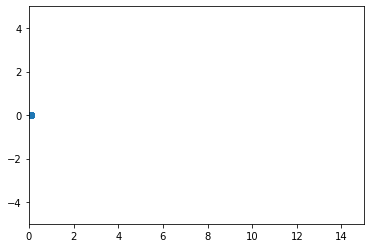

In [44]:
plt.scatter(xs, ys)
plt.xlim(0, 15)
plt.ylim(-5, 5)
plt.show()

This is far more useful with the geometry present, so let's plot that on the figure as well.

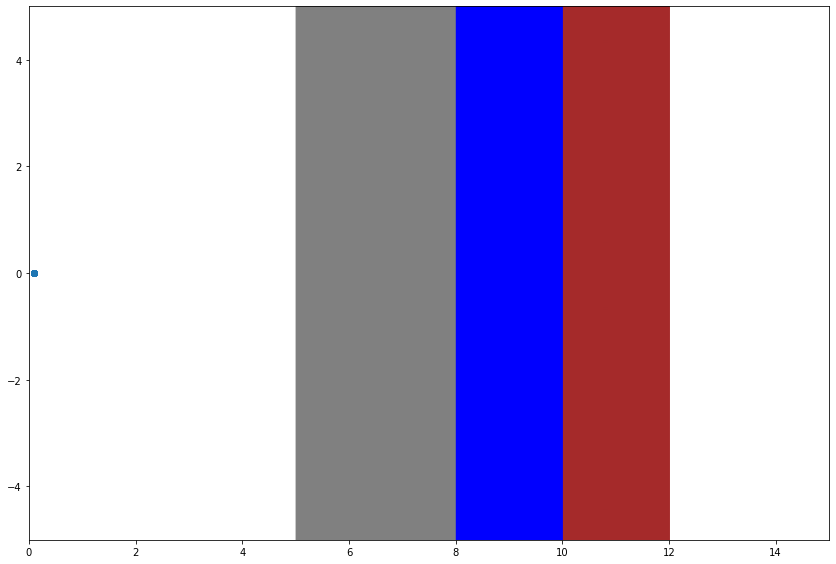

In [45]:
model.geometry.root_universe.plot(origin=(7.0, 0.0, 0.0), width=(15.0, 10.0), pixels=(800, 800), color_by='material', colors=material_colors)
plt.scatter(xs, ys)
plt.xlim(0, 15)
plt.ylim(-5, 5)
plt.show()

We're going to continue repeating the steps of running and plotting this data, so let's create a function that makes this more convenient for us.

In [46]:
def run_and_plot(model, n_particles=None):
    # write the first 1000 tracks
    model.settings.max_tracks = 1000
    
    if n_particles is None:
        n_particles = model.settings.max_tracks
    
    # run the model
    sp_filename = model.run(tracks=True, output=False)
   
    # open the tracks file (default input name is "tracks.h5
    tracks = openmc.Tracks()
    
    xs = []
    ys = []
    zs = []
    for track in tracks:
        particle = track.particle_tracks[0]
        source_state = particle.states[0]
        x, y, z = source_state['r']
        xs.append(x)
        ys.append(y)
        zs.append(z)
    
    # compute some information about the model bounds
    llc, urc = model.geometry.root_universe.bounding_box
    center = 0.5 * (llc + urc)
    width = urc - llc
    
    fig = plt.figure()
    # plot the geometry on the matplotlib figure
    model.geometry.root_universe.plot(origin=center, width=(width[0], width[1]), pixels=(800, 800), color_by='material', colors=material_colors)

    # plot source sites
    plt.scatter(xs[:n_particles], ys[:n_particles])
    plt.xlim(llc[0], urc[0])
    plt.ylim(llc[1], urc[1])
    
    plt.show()
    
    # plot flux results
    with openmc.StatePoint(sp_filename) as sp:
        flux_mesh_tally = sp.get_tally(name='mesh flux')
    
    photon_mean = flux_mesh_tally.mean
    plt.imshow(photon_mean.reshape(*mesh.dimension[:2][::-1]), origin='lower', extent=(llc[0], urc[0], llc[1], urc[1]), norm=LogNorm())
    

## Line Sources

Now let's update our source term a bit. We'll define a line source parallel to the Y axis.

In [47]:
y_dist = openmc.stats.Uniform(-5.0, 5.0)
x_dist = openmc.stats.Uniform(0.1, 0.1)
z_dist = openmc.stats.Uniform(0.0, 0.0)
space = openmc.stats.CartesianIndependent(x=x_dist, y=y_dist, z=z_dist)

In [48]:
model.settings.source[0].space = space

<Figure size 432x288 with 0 Axes>

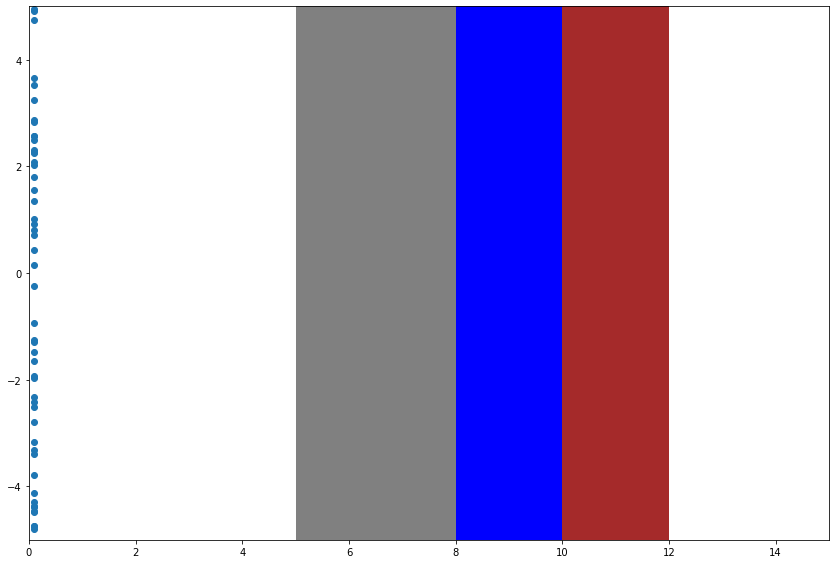

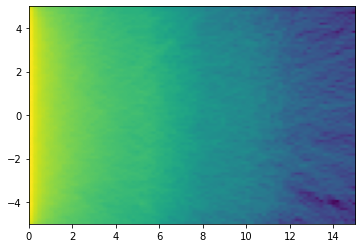

In [49]:
run_and_plot(model, 50)

## Discrete Sources

In [50]:
y_dist =openmc.stats.Discrete([-4.0, -2.5, 2.5, 4.0], [0.1, 0.1, 0.4, 0.4])
x_dist = openmc.stats.Uniform(0.1, 0.1)
z_dist = openmc.stats.Uniform(0.0, 0.0)
space = openmc.stats.CartesianIndependent(x=x_dist, y=y_dist, z=z_dist)

In [51]:
model.settings.source[0].space = space

<Figure size 432x288 with 0 Axes>

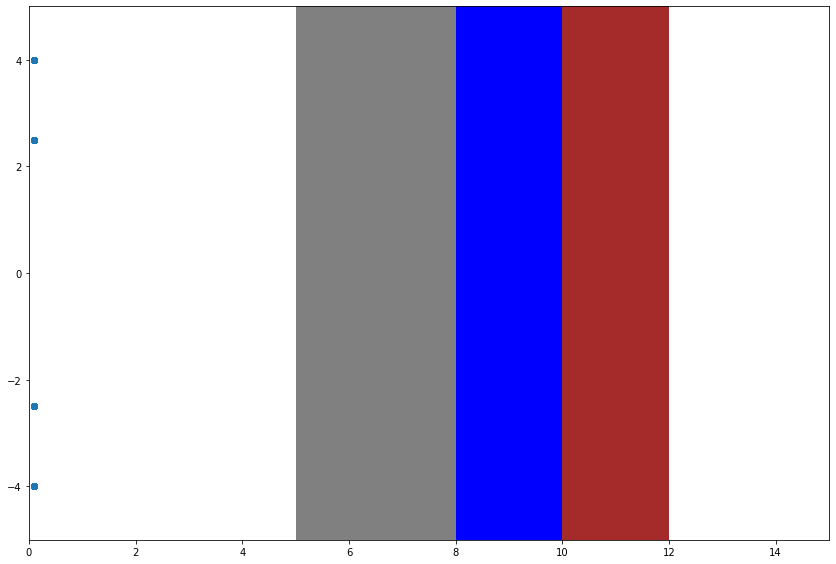

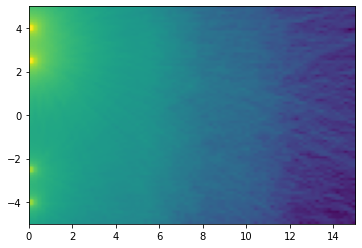

In [52]:
run_and_plot(model)

In [53]:
x_dist = openmc.stats.Discrete([1.0, 4.0], [0.5, 0.5])
space.x = x_dist

<Figure size 432x288 with 0 Axes>

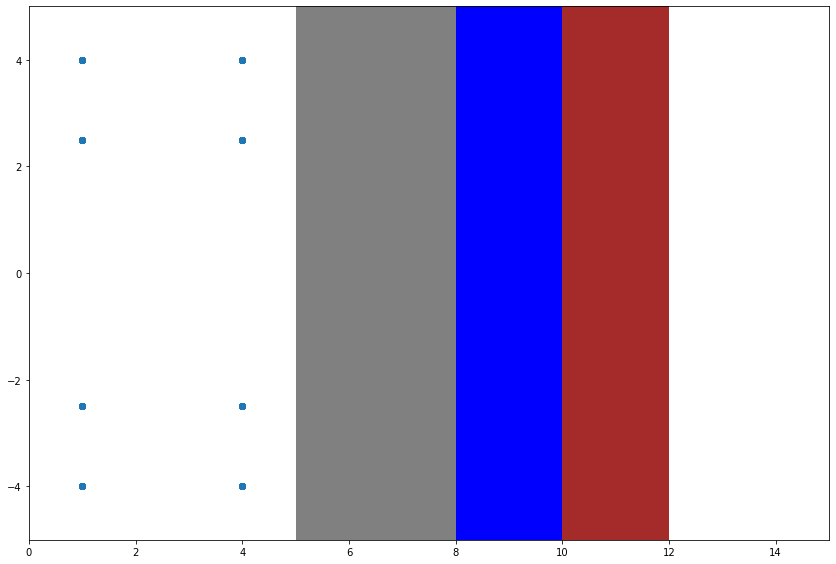

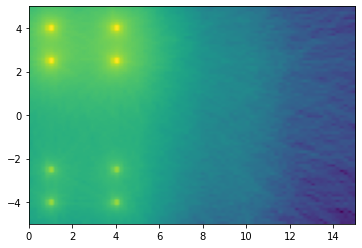

In [54]:
run_and_plot(model)

In [55]:
angle = openmc.stats.Monodirectional((1.0, 0.0, 0.0))

In [56]:
model.settings.source[0].angle = angle

<Figure size 432x288 with 0 Axes>

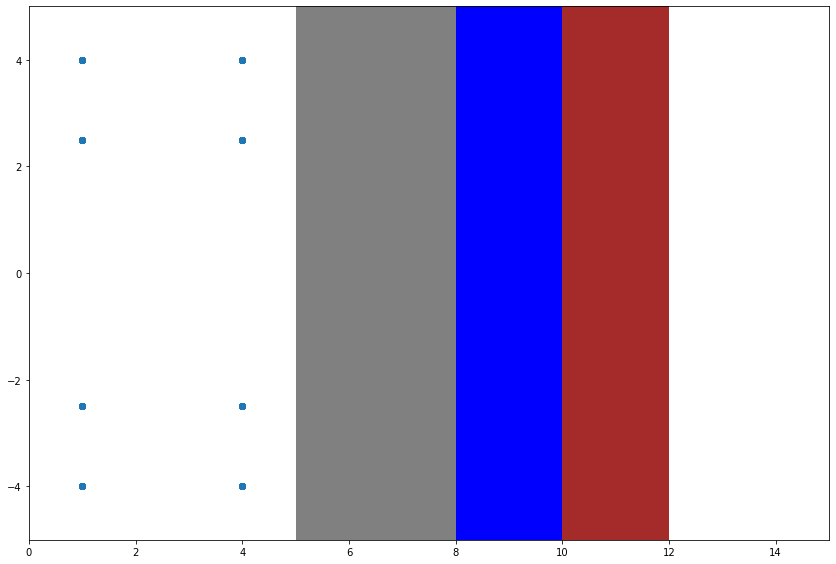

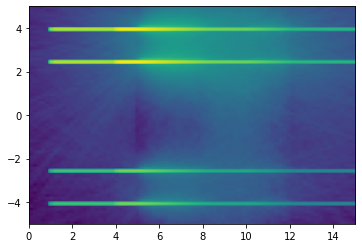

In [57]:
run_and_plot(model)

In [58]:
angle.reference_uvw = (0.0, 1.0, 0.0)

<Figure size 432x288 with 0 Axes>

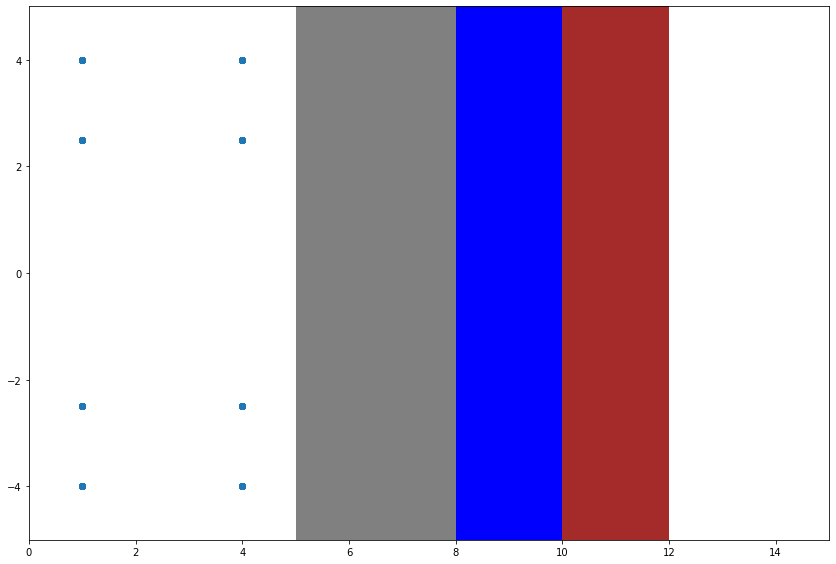

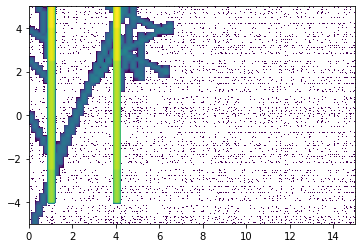

In [59]:
run_and_plot(model)

## Cylindrical Sources

In [60]:
model.settings.source[0].angle = openmc.stats.Isotropic()

In [61]:
r = openmc.stats.Uniform(0.1, 3.0)
phi = openmc.stats.Uniform(-0.5*np.pi, 0.5*np.pi)
z = openmc.stats.Discrete([0.0], [1.0])
space = openmc.stats.CylindricalIndependent(r=r, phi=phi, z=z)
model.settings.source[0].space = space

<Figure size 432x288 with 0 Axes>

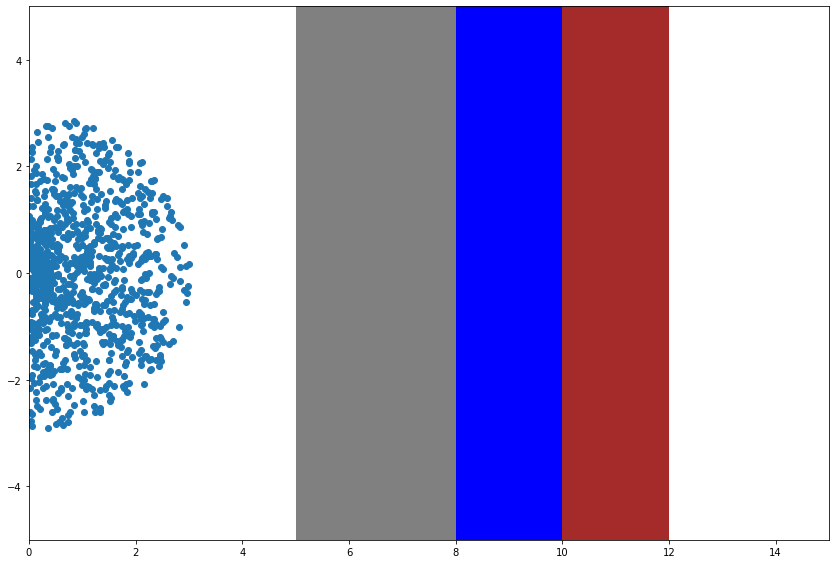

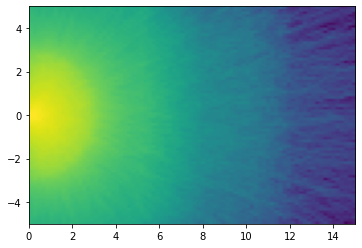

In [62]:
run_and_plot(model)

In [63]:
# ring source
# extend to 3D; spherical sources

In [64]:
r = openmc.stats.Discrete([3.0], [1.0])
phi = openmc.stats.Uniform(-0.5*np.pi, 0.5*np.pi)
z = openmc.stats.Discrete([0.0], [1.0])
space = openmc.stats.CylindricalIndependent(r=r, phi=phi, z=z)
model.settings.source[0].space = space
model.settings.source[0].angle = openmc.stats.Isotropic()

<Figure size 432x288 with 0 Axes>

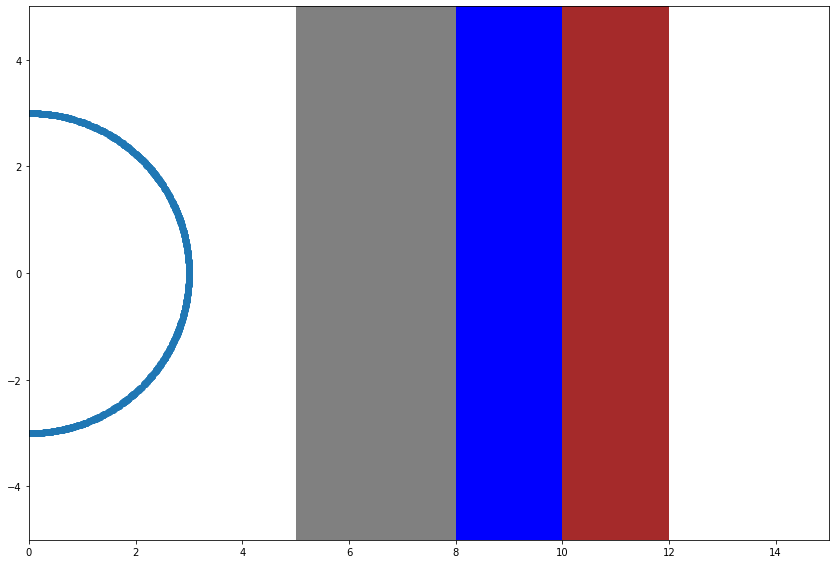

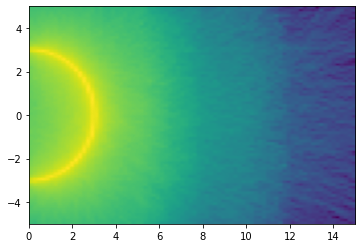

In [65]:
run_and_plot(model)

In [66]:
r = openmc.stats.Discrete([3.0], [1.0])
phi = openmc.stats.Uniform(0.25 * np.pi, 0.5 * np.pi)
z = openmc.stats.Discrete([0.0], [1.0])
space = openmc.stats.CylindricalIndependent(r=r, phi=phi, z=z)
source0 = openmc.Source(space=space)

r = openmc.stats.Discrete([3.0], [1.0])
phi = openmc.stats.Uniform(1.5 * np.pi, 1.75 * np.pi)
z = openmc.stats.Discrete([0.0], [1.0])
space = openmc.stats.CylindricalIndependent(r=r, phi=phi, z=z)
source1 = openmc.Source(space=space)

model.settings.source = [source0, source1]

<Figure size 432x288 with 0 Axes>

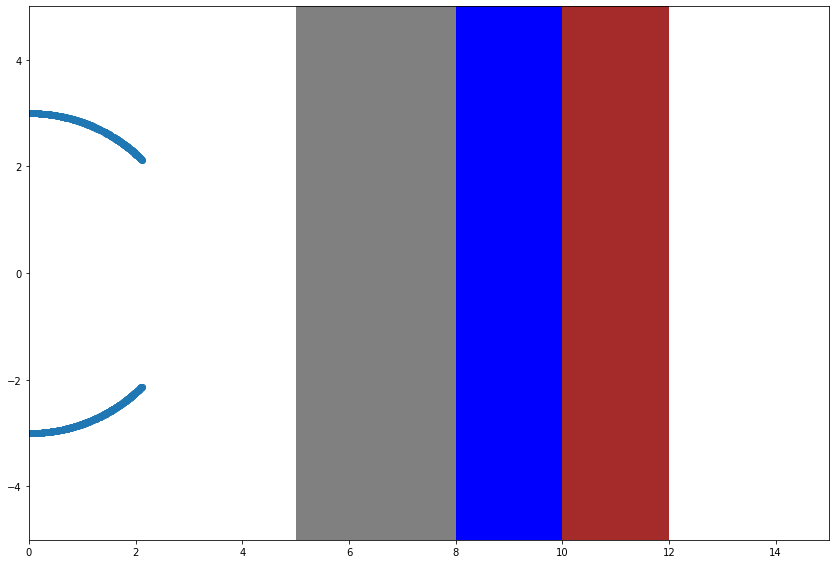

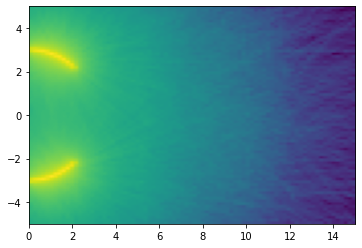

In [67]:
run_and_plot(model)

In [68]:
source0.strength = 0.2
source1.strength = 0.8
model.settings.source = [source0, source1]

<Figure size 432x288 with 0 Axes>

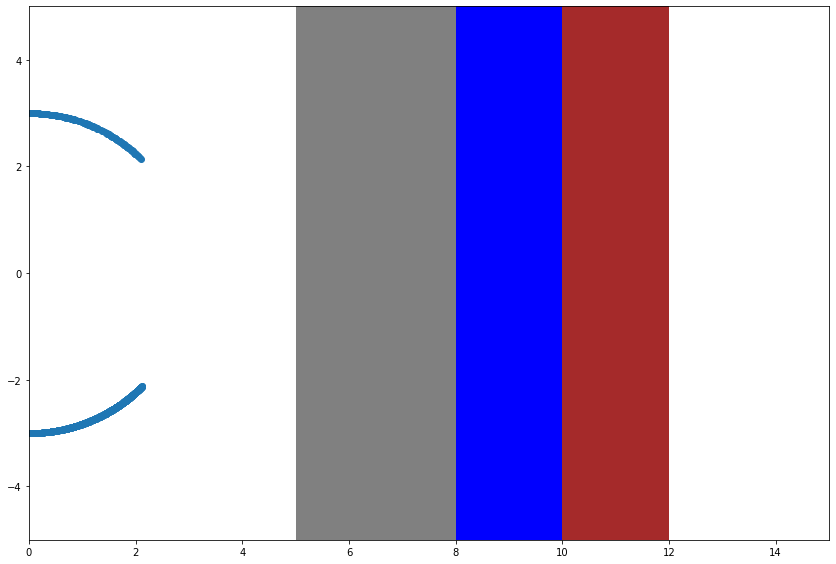

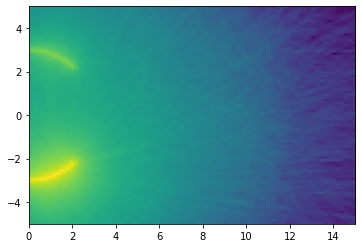

In [69]:
run_and_plot(model)

In [70]:
r = openmc.stats.Discrete([0.0], [1.0])
phi = openmc.stats.Uniform(0.0, 2 * np.pi)
z = openmc.stats.Discrete([0.0], [1.0])
space = openmc.stats.CylindricalIndependent(r=r, phi=phi, z=z)
space.origin = (0.1, 0.0, 0.0)

# openmc.stats.PolarAzimuthal
mu = openmc.stats.Discrete([0.0], [1.0])
phi = openmc.stats.Uniform(-0.25 * np.pi, 0.25 * np.pi)
angle = openmc.stats.PolarAzimuthal(mu=mu, phi=phi)
print(angle.reference_uvw)

source = openmc.Source(space=space, angle=angle, energy=energy)

model.settings.source = source

[0. 0. 1.]


<Figure size 432x288 with 0 Axes>

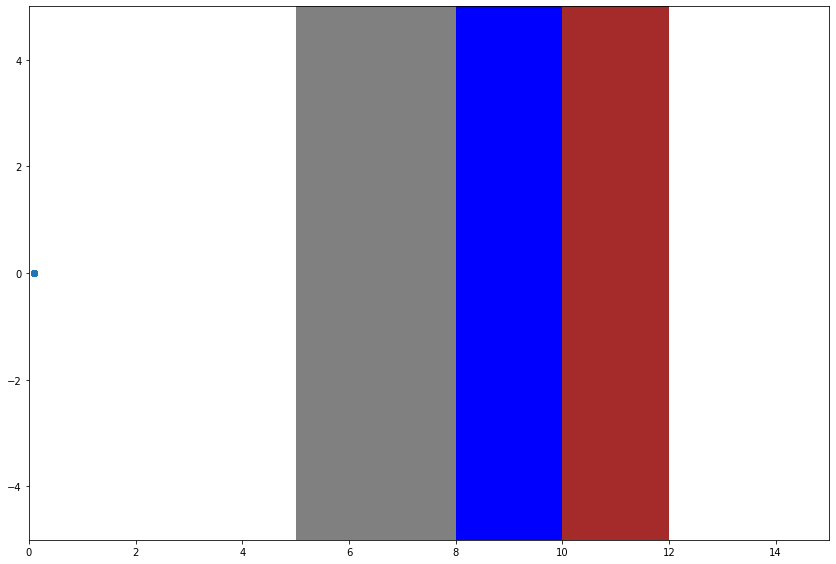

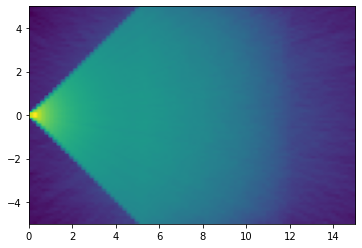

In [71]:
run_and_plot(model)

# Volume sources

A source can also be specified using a domain which can either be an iterable of cells, universes, regions, geometries or materials

source is restricted to a bounding box of (array([ 5., -5., -5.]), array([8., 5., 5.])) and a single cell


<Figure size 432x288 with 0 Axes>

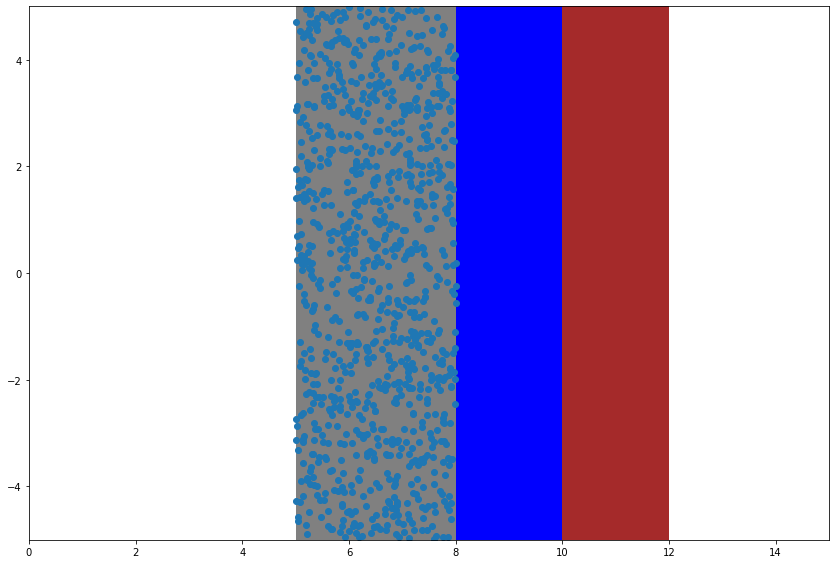

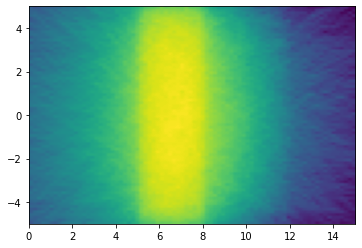

In [72]:
space = openmc.stats.Box(*cell1.bounding_box)
print(f'source is restricted to a bounding box of {cell1.bounding_box} and a single cell')
model.settings.source = openmc.Source(space=space, domains=[cell1])
run_and_plot(model)

source is restricted to a bounding box of (array([ 5., -5., -5.]), array([8., 5., 5.])) and two cells


<Figure size 432x288 with 0 Axes>

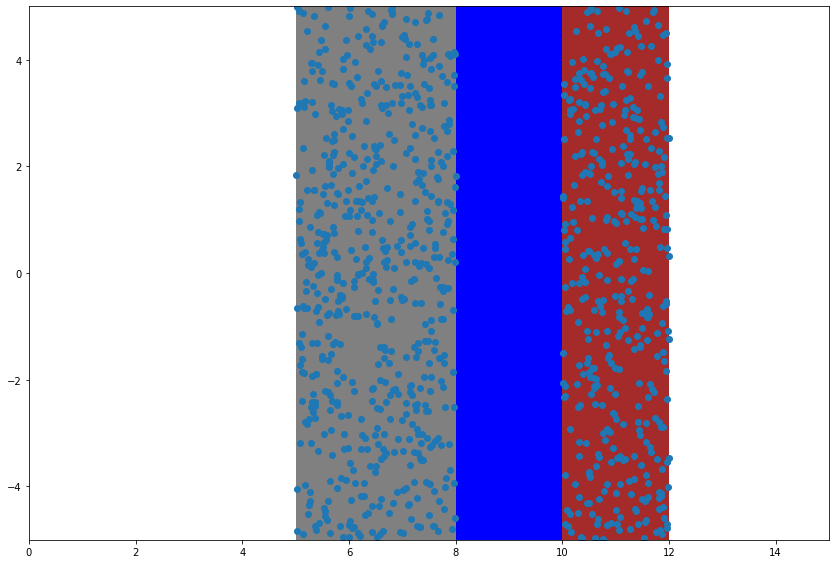

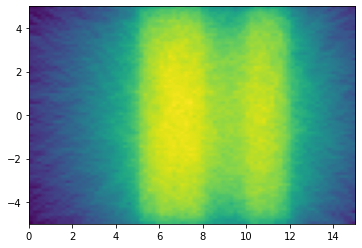

In [73]:
space = openmc.stats.Box(*geometry.bounding_box)
print(f'source is restricted to a bounding box of {cell1.bounding_box} and two cells')
model.settings.source = openmc.Source(space=space, domains=[cell1, cell3])
run_and_plot(model)

source is restricted to a bounding box of (array([ 0., -5., -5.]), array([15.,  5.,  5.])) and any cells with material air


<Figure size 432x288 with 0 Axes>

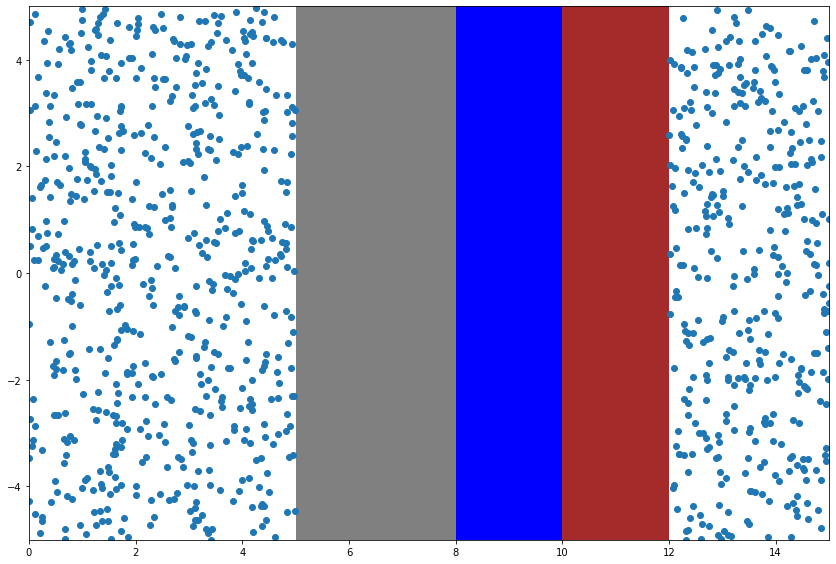

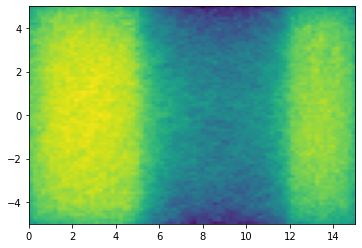

In [74]:
space = openmc.stats.Box(*geometry.bounding_box)
print(f'source is restricted to a bounding box of {geometry.bounding_box} and any cells with material air')
model.settings.source = openmc.Source(space=space, domains=[air])
run_and_plot(model)